# Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

# Reading Dataset

In [3]:
dataset = pd.read_csv("C:\\Users\\harik\\Desktop\\ICP_Python\\Fraud Detection\\creditcard.csv")

In [66]:
# determining the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(dataset.shape[0], dataset.shape[1]))

The dataset contains 284807 rows and 30 columns.


In [99]:
fraud = dataset.loc[dataset['Class'] == 1]
normal = dataset.loc[dataset['Class'] == 0]

print('Normal Transactions :', len(normal))
print('Fraud Transactions :',len(fraud))

Normal Transactions : 284315
Fraud Transactions : 492


Text(0, 0.5, 'Frequency')

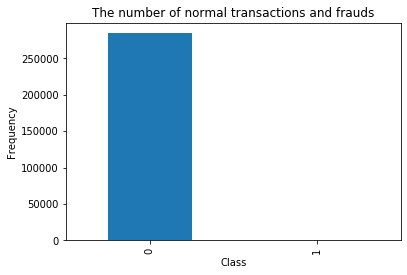

In [80]:
pd.value_counts(dataset['Class'], sort=True).plot(kind='bar')
plt.title('The number of normal transactions and frauds')
plt.xlabel('Class')
plt.ylabel('Frequency')

# Standardize data

In [5]:
sc = StandardScaler()
dataset['normalizedAmount'] = sc.fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'], axis = 1)

In [6]:
dataset = dataset.drop(['Time'], axis = 1)
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


# Separate feature data (predictors) from labels

In [7]:
X = dataset.iloc[:, dataset.columns != 'Class'].values
y = dataset.iloc[:, dataset.columns == 'Class'].values

# Partition data into train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state = 0)

# Training Models
RandomForest classifiers, Logistic Regression, Decision Tree , and Naive Baye were trained using the processed feature data.

In [12]:
# Train Random Forest Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);
y_pred_RDF_Classifier = RDF_Classifier.predict(X_test)
cm_RDF_Classifier = confusion_matrix(y_test, y_pred_RDF_Classifier)

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression()
LGR_Classifier.fit(X_train, y_train);
y_pred_LGR_Classifier = LGR_Classifier.predict(X_test)
cm_LGR_Classifier = confusion_matrix(y_test, y_pred_LGR_Classifier)


# Train Decision Tree Model
DT_Classifier = DecisionTreeClassifier()
DT_Classifier.fit(X_train, y_train);
y_pred_DT_Classifier = DT_Classifier.predict(X_test)
cm_DT_Classifier = confusion_matrix(y_test, y_pred_DT_Classifier)

# Train Bernoulli Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train);
y_pred_BNB_Classifier = BNB_Classifier.predict(X_test)
cm_BNB_Classifier = confusion_matrix(y_test, y_pred_BNB_Classifier)


C:\Users\harik\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\harik\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


# Confusion matrix before SMOTE


In [49]:
print('Random Forest Model - Confusion Matrix Before Smote''\n', cm_RDF_Classifier)
print('LogisticRegression Model - Confusion Matrix Before Smote''\n', cm_LGR_Classifier)
print('Decision Tree Model - Confusion Matrix Before Smote''\n', cm_DT_Classifier)
print('Bernoulli Naive Baye Model - Confusion Matrix Before Smote''\n', cm_BNB_Classifier)

Random Forest Model - Confusion Matrix Before Smote
 [[85284    12]
 [   28   119]]
LogisticRegression Model - Confusion Matrix Before Smote
 [[83228  2068]
 [   12   135]]
Decision Tree Model - Confusion Matrix Before Smote
 [[85121   175]
 [   31   116]]
Bernoulli Naive Baye Model - Confusion Matrix Before Smote
 [[84699   597]
 [   28   119]]


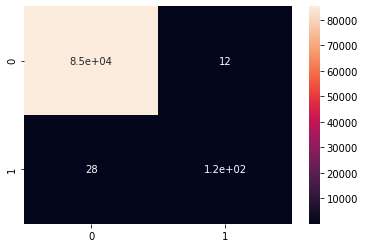

In [84]:
sns.heatmap(cm_RDF_Classifier, annot = True)

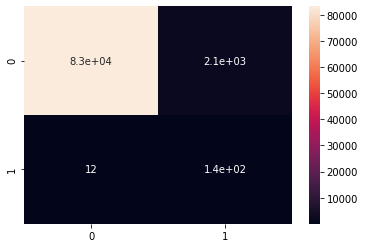

In [51]:
sns.heatmap(cm_LGR_Classifier, annot = True)

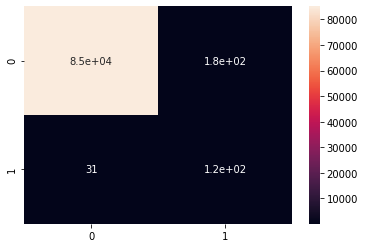

In [52]:
sns.heatmap(cm_DT_Classifier, annot = True)

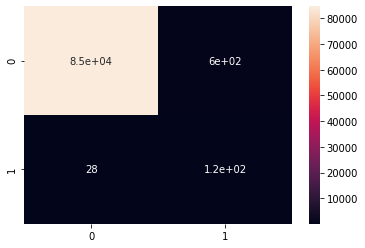

In [53]:
sns.heatmap(cm_BNB_Classifier, annot = True)

# Data Sampling
As noted earlier, the dataset is unbalanced. Training unbalanced dataset with learning algorithms may lead to misclassification of minority class. Therefore, to compensate for the unbalancedness, we will use SMOTE oversampling method as implemented in imbalanced-learn package to resample the dataset. SMOTE is an oversampling technique that adaptively generates minority data samples according to their distributions using K nearest neighbor.

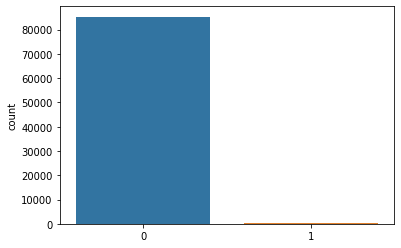

In [14]:
from imblearn import under_sampling, over_sampling 
from imblearn.over_sampling import SMOTE
sm = SMOTE() 
X_train, y_train = sm.fit_sample(X_train, y_train)
y_test = np.concatenate(y_test)
sns.countplot(y_test)

# Training Models after SMOTE and evaluating performance

In [17]:
RDF_Classifier_resampled = RandomForestClassifier(n_estimators=100)
RDF_Classifier_resampled.fit(X_train, y_train)
y_pred_RDF_Classifier = RDF_Classifier_resampled.predict(X_test)
cm_RDF_Classifier = confusion_matrix(y_test, y_pred_RDF_Classifier)

LGR_Classifier_resampled = LogisticRegression()
LGR_Classifier_resampled.fit(X_train, y_train)
y_pred_LGR_Classifier = LGR_Classifier_resampled.predict(X_test)
cm_LGR_Classifier = confusion_matrix(y_test, y_pred_LGR_Classifier)

DT_Classifier_resampled = DecisionTreeClassifier()
DT_Classifier_resampled.fit(X_train, y_train)
y_pred_DT_Classifier = DT_Classifier_resampled.predict(X_test)
cm_DT_Classifier = confusion_matrix(y_test, y_pred_DT_Classifier)

BNB_Classifier_resampled = BernoulliNB()
BNB_Classifier_resampled.fit(X_train, y_train)
y_pred_BNB_Classifier = BNB_Classifier_resampled.predict(X_test)
cm_BNB_Classifier = confusion_matrix(y_test, y_pred_BNB_Classifier)

# Confusion matrix after SMOTE


In [37]:
print('Random Forest Model - Confusion Matrix After Smote''\n', cm_RDF_Classifier)
print('LogisticRegression Model - Confusion Matrix After Smote''\n', cm_LGR_Classifier)
print('Decision Tree Model - Confusion Matrix After Smote''\n', cm_DT_Classifier)
print('Bernoulli Naive Baye Model - Confusion Matrix After Smote''\n', cm_BNB_Classifier)


Random Forest Model - Confusion Matrix After Smote
 [[85284    12]
 [   28   119]]
LogisticRegression Model - Confusion Matrix After Smote
 [[83228  2068]
 [   12   135]]
Decision Tree Model - Confusion Matrix After Smote
 [[85121   175]
 [   31   116]]
Bernoulli Naive Baye Model - Confusion Matrix After Smote
 [[84699   597]
 [   28   119]]


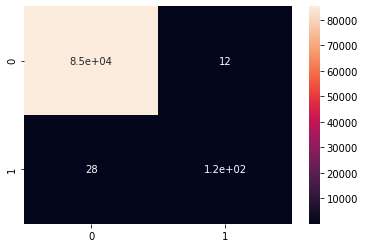

In [39]:
sns.heatmap(cm_RDF_Classifier, annot = True)

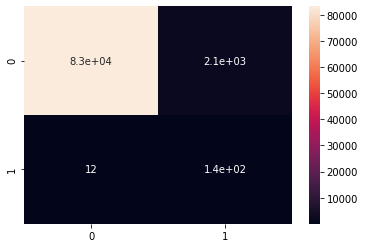

In [40]:
sns.heatmap(cm_LGR_Classifier, annot = True)

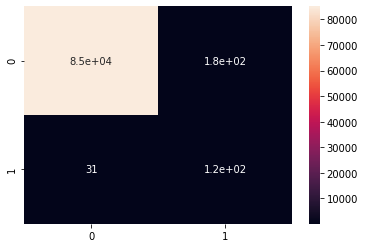

In [41]:
sns.heatmap(cm_DT_Classifier, annot = True)

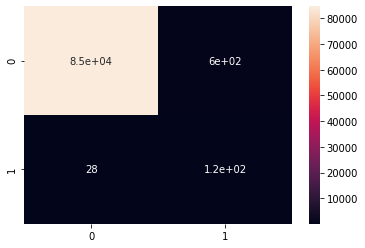

In [42]:
sns.heatmap(cm_BNB_Classifier, annot = True)

# Classification Reports of each Models

In [69]:
print('---------------Random Forest Classifier--------------')
print(classification_report(y_test, y_pred_RDF_Classifier))
print('---------------Linear Regression---------------')
print(classification_report(y_test, y_pred_LGR_Classifier))
print('---------------Decision Tree-------------------------')
print(classification_report(y_test, y_pred_DT_Classifier))
print('---------------Naive Bayes---------------------------')
print(classification_report(y_test, y_pred_BNB_Classifier))

---------------Random Forest Classifier--------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.91      0.81      0.86       147

    accuracy                           1.00     85443
   macro avg       0.95      0.90      0.93     85443
weighted avg       1.00      1.00      1.00     85443

---------------Linear Regression---------------
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

---------------Decision Tree-------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.40      0.79      0.53       147

    accuracy              

# Receiver Operating Characteristic of Random Forest Classifier

AUC of Random Forest Classifier 0.9046915614867218


Text(0.5, 0, 'False Positive Rate')

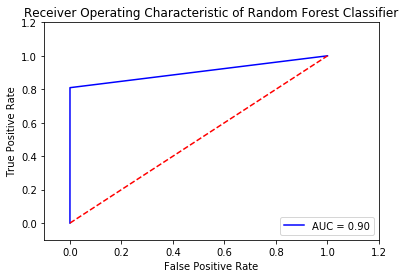

In [27]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_RDF_Classifier)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('AUC of Random Forest Classifier', roc_auc)
plt.title('Receiver Operating Characteristic of Random Forest Classifier')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Receiver Operating Characteristic of Logistic Regression Classifier

AUC of Logistic Regression Classifier 0.947061182379536


Text(0.5, 0, 'False Positive Rate')

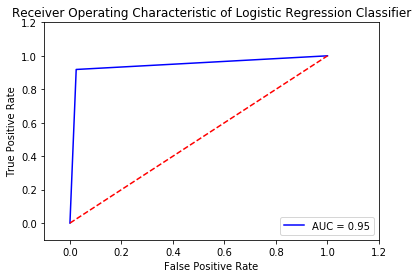

In [28]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_LGR_Classifier)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('AUC of Logistic Regression Classifier', roc_auc)
plt.title('Receiver Operating Characteristic of Logistic Regression Classifier')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Receiver Operating Characteristic of Decision Tree Classifier

AUC of Decision Tree Classifier 0.8935319836995012


Text(0.5, 0, 'False Positive Rate')

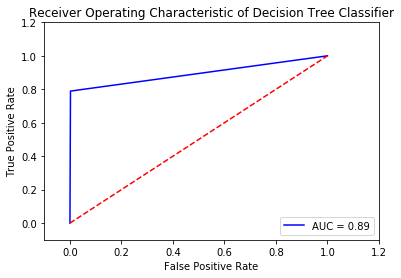

In [29]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_DT_Classifier)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('AUC of Decision Tree Classifier', roc_auc)
plt.title('Receiver Operating Characteristic of Decision Tree Classifier')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Receiver Operating Characteristic of Naive Bayes Classifier

AUC of Naive Bayes Classifier 0.9012623268215558


Text(0.5, 0, 'False Positive Rate')

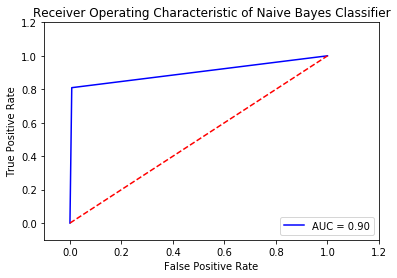

In [30]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_BNB_Classifier)
roc_auc = auc(false_positive_rate, true_positive_rate)
print ('AUC of Naive Bayes Classifier', roc_auc)
plt.title('Receiver Operating Characteristic of Naive Bayes Classifier')
plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')